In [1]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim

In [2]:
from utils import get_device , visualize_data

device = get_device()

Device :  cuda


In [3]:
from dataset import CIFAR10

data = CIFAR10()

train_loader , test_loader = data.get_loaders()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

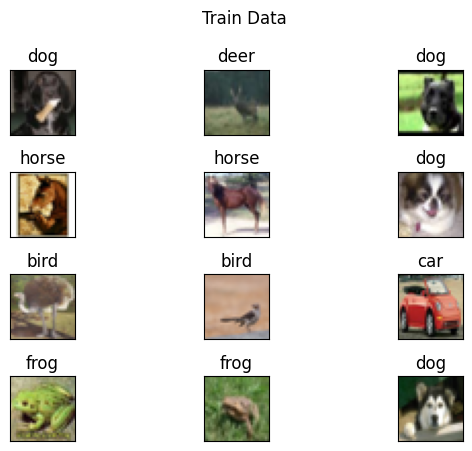

In [5]:
visualize_data(train_loader,12,"Train Data",classes)

# Model

## BatchNorm

In [6]:
from model import Model

In [7]:
model1 = Model(norm_type = "batch",dropout=0.01, skip=True).to(device)
from torchsummary import summary
summary(model1 , input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
       BatchNorm2d-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
           Dropout-4           [-1, 16, 30, 30]               0
         ConvLayer-5           [-1, 16, 30, 30]               0
            Conv2d-6           [-1, 16, 28, 28]           2,304
       BatchNorm2d-7           [-1, 16, 28, 28]              32
              ReLU-8           [-1, 16, 28, 28]               0
           Dropout-9           [-1, 16, 28, 28]               0
        ConvLayer-10           [-1, 16, 28, 28]               0
           Conv2d-11           [-1, 24, 28, 28]             384
        MaxPool2d-12           [-1, 24, 14, 14]               0
           Conv2d-13           [-1, 24, 14, 14]           5,184
      BatchNorm2d-14           [-1, 24,

In [8]:
from backprop import train , test

In [9]:
optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.3)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 20

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model1, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model1, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.249465823173523 Batch_id=390 Accuracy=45.15: 100%|██████████| 391/391 [00:19<00:00, 19.88it/s]



Test set: Average loss: 1.3501, Accuracy: 5035/10000 (50.35%)

EPOCH: 1


Loss=1.1698219776153564 Batch_id=390 Accuracy=59.50: 100%|██████████| 391/391 [00:20<00:00, 19.55it/s]



Test set: Average loss: 1.1180, Accuracy: 5968/10000 (59.68%)

EPOCH: 2


Loss=0.8889883756637573 Batch_id=390 Accuracy=64.57: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]



Test set: Average loss: 0.9999, Accuracy: 6441/10000 (64.41%)

EPOCH: 3


Loss=1.0819884538650513 Batch_id=390 Accuracy=67.81: 100%|██████████| 391/391 [00:20<00:00, 19.19it/s]



Test set: Average loss: 0.9049, Accuracy: 6809/10000 (68.09%)

EPOCH: 4


Loss=0.8402599096298218 Batch_id=390 Accuracy=70.14: 100%|██████████| 391/391 [00:20<00:00, 19.22it/s]



Test set: Average loss: 1.0705, Accuracy: 6455/10000 (64.55%)

Epoch 00005: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 5


Loss=0.8400141000747681 Batch_id=390 Accuracy=74.49: 100%|██████████| 391/391 [00:19<00:00, 19.65it/s]



Test set: Average loss: 0.7687, Accuracy: 7271/10000 (72.71%)

EPOCH: 6


Loss=0.7196792960166931 Batch_id=390 Accuracy=75.40: 100%|██████████| 391/391 [00:19<00:00, 19.66it/s]



Test set: Average loss: 0.7580, Accuracy: 7321/10000 (73.21%)

EPOCH: 7


Loss=0.8744324445724487 Batch_id=390 Accuracy=76.14: 100%|██████████| 391/391 [00:19<00:00, 20.04it/s]



Test set: Average loss: 0.7569, Accuracy: 7359/10000 (73.59%)

EPOCH: 8


Loss=0.7952184677124023 Batch_id=390 Accuracy=76.70: 100%|██████████| 391/391 [00:19<00:00, 19.96it/s]



Test set: Average loss: 0.7309, Accuracy: 7444/10000 (74.44%)

EPOCH: 9


Loss=0.6351454854011536 Batch_id=390 Accuracy=77.23: 100%|██████████| 391/391 [00:20<00:00, 19.46it/s]



Test set: Average loss: 0.7261, Accuracy: 7459/10000 (74.59%)

EPOCH: 10


Loss=0.7135940790176392 Batch_id=390 Accuracy=77.53: 100%|██████████| 391/391 [00:20<00:00, 19.40it/s]



Test set: Average loss: 0.7201, Accuracy: 7424/10000 (74.24%)

EPOCH: 11


Loss=0.5491148829460144 Batch_id=390 Accuracy=78.25: 100%|██████████| 391/391 [00:19<00:00, 19.92it/s]



Test set: Average loss: 0.7452, Accuracy: 7358/10000 (73.58%)

Epoch 00012: reducing learning rate of group 0 to 9.0000e-04.
EPOCH: 12


Loss=0.5909003615379333 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:19<00:00, 20.17it/s]



Test set: Average loss: 0.6831, Accuracy: 7583/10000 (75.83%)

EPOCH: 13


Loss=0.41533178091049194 Batch_id=390 Accuracy=80.18: 100%|██████████| 391/391 [00:19<00:00, 20.34it/s]



Test set: Average loss: 0.6785, Accuracy: 7626/10000 (76.26%)

EPOCH: 14


Loss=0.49714207649230957 Batch_id=390 Accuracy=80.38: 100%|██████████| 391/391 [00:19<00:00, 19.75it/s]



Test set: Average loss: 0.6835, Accuracy: 7607/10000 (76.07%)

Epoch 00015: reducing learning rate of group 0 to 2.7000e-04.
EPOCH: 15


Loss=0.4597647786140442 Batch_id=390 Accuracy=81.18: 100%|██████████| 391/391 [00:20<00:00, 19.53it/s]



Test set: Average loss: 0.6723, Accuracy: 7647/10000 (76.47%)

EPOCH: 16


Loss=0.5805305242538452 Batch_id=390 Accuracy=81.04: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.6709, Accuracy: 7644/10000 (76.44%)

EPOCH: 17


Loss=0.5973940491676331 Batch_id=390 Accuracy=81.01: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]



Test set: Average loss: 0.6700, Accuracy: 7674/10000 (76.74%)

EPOCH: 18


Loss=0.5841543078422546 Batch_id=390 Accuracy=81.04: 100%|██████████| 391/391 [00:19<00:00, 20.50it/s]



Test set: Average loss: 0.6688, Accuracy: 7669/10000 (76.69%)

EPOCH: 19


Loss=0.5285848379135132 Batch_id=390 Accuracy=81.27: 100%|██████████| 391/391 [00:19<00:00, 20.47it/s]



Test set: Average loss: 0.6702, Accuracy: 7670/10000 (76.70%)

Epoch 00020: reducing learning rate of group 0 to 8.1000e-05.


# Plotting

In [10]:
from backprop import plot_graphs ,get_misclassified_images , show_misclassified_images

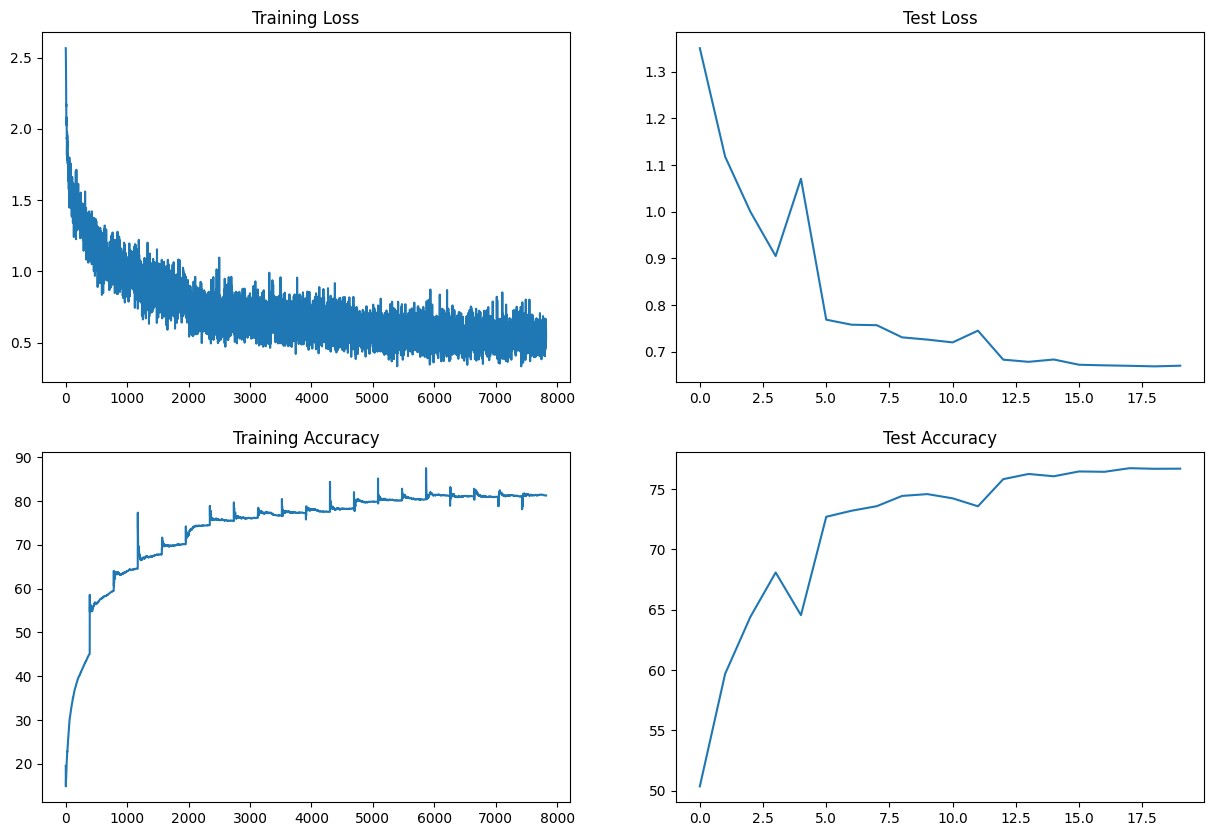

In [11]:
plot_graphs(train_losses , train_acc , test_losses , test_acc)

In [12]:
misclassified_images, predictions, labels = get_misclassified_images(model1 , test_loader , device)

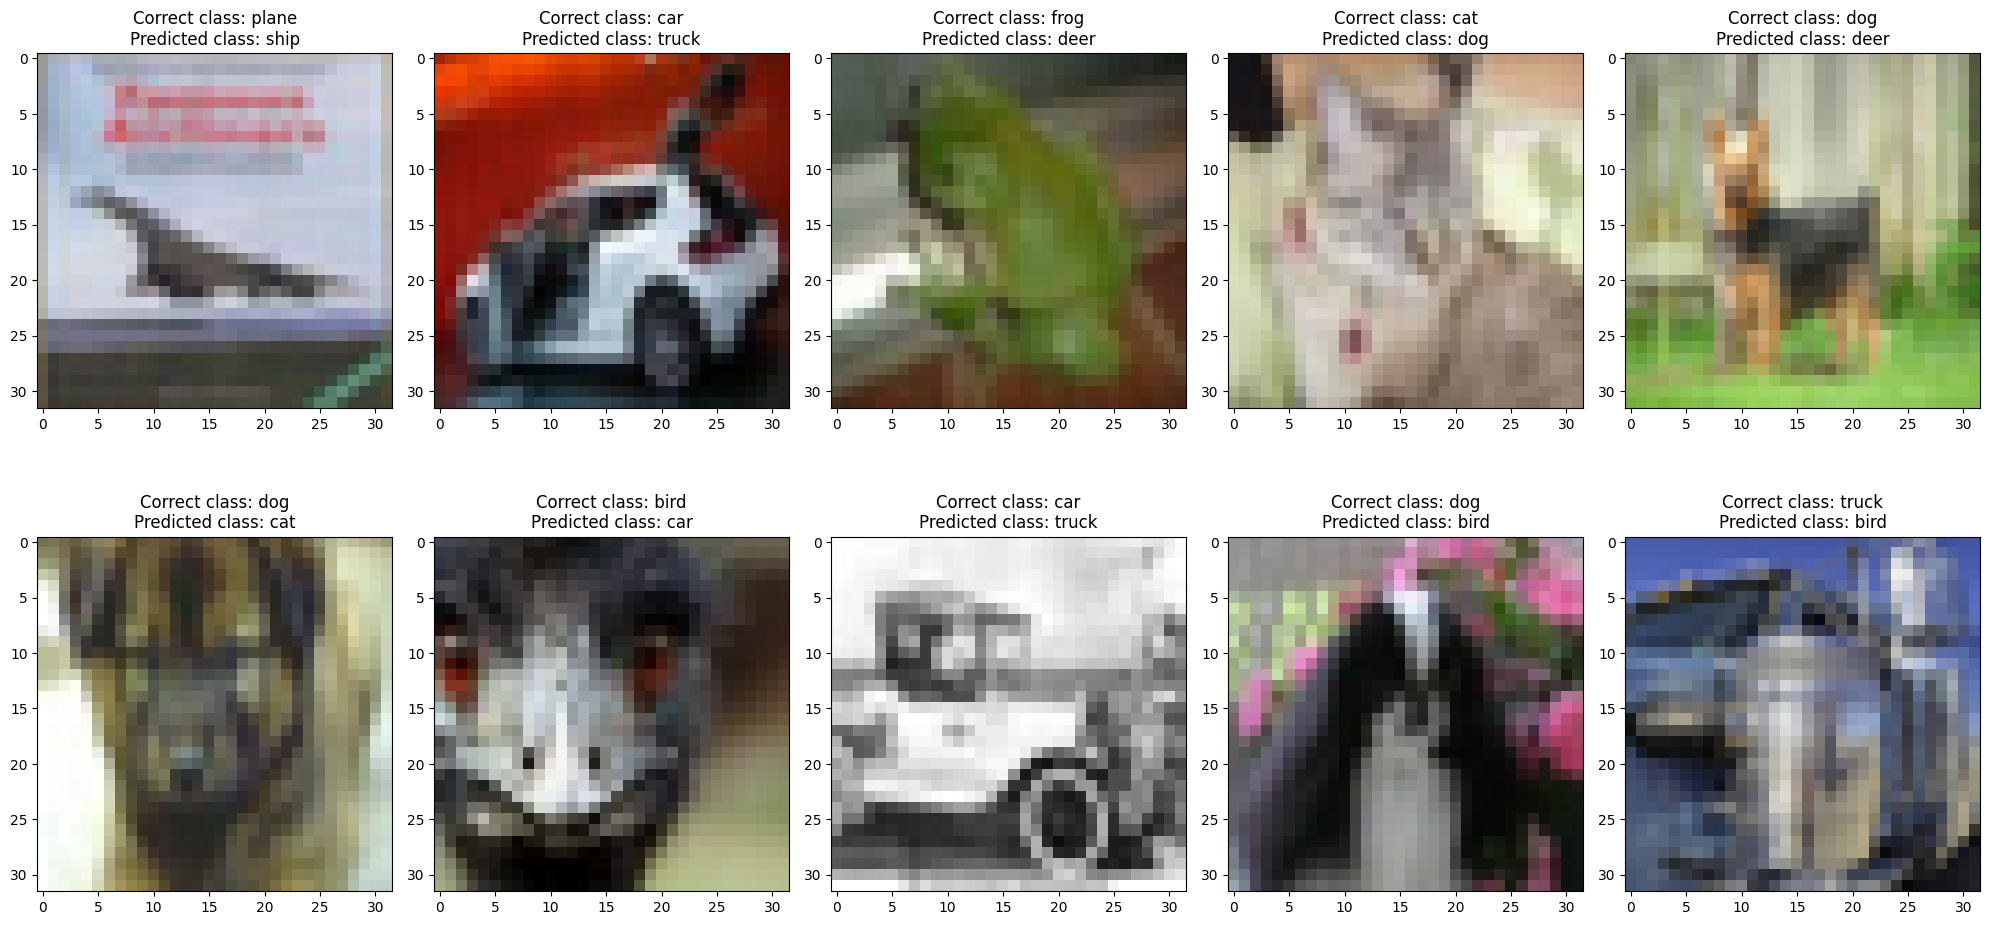

In [13]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)